In [1]:
import numpy as np 
import pandas as pd 
import librosa
import os

In [2]:
def extract_mfcc(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        return np.mean(mfccs.T, axis=0)
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

def extract_features_from_directory(directory):
    features = []
    labels = []
    for genre in os.listdir(directory):
        genre_dir = os.path.join(directory, genre)
        if os.path.isdir(genre_dir):
            for file_name in os.listdir(genre_dir):
                file_path = os.path.join(genre_dir, file_name)
                mfcc_features = extract_mfcc(file_path)
                if mfcc_features is not None:
                    features.append(mfcc_features)
                    labels.append(genre)
    return np.array(features), np.array(labels)

dir = "../data/genres_original"
features, labels = extract_features_from_directory(dir)

c:\Users\prudh\anaconda3\envs\gen_ai1\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Error processing file ../data/genres_original\jazz\jazz.00054.wav: 


In [3]:
df = pd.DataFrame(features)
df['genre'] = labels
df.to_csv('../data/gtzan_features.csv', index=False)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,genre
0,-113.598824,121.570671,-19.162262,42.363941,-6.362266,18.621931,-13.699734,15.339802,-12.274304,10.970945,-8.326061,8.802088,-3.669941,blues
1,-207.523834,123.985138,8.947019,35.867149,2.909595,21.519472,-8.556513,23.370676,-10.103608,11.899242,-5.558824,5.377876,-2.234492,blues
2,-90.757164,140.440872,-29.084547,31.686693,-13.976547,25.753752,-13.664990,11.634442,-11.778322,9.714756,-13.125314,5.791247,-8.901966,blues
3,-199.575134,150.086105,5.663404,26.855278,1.770071,14.232647,-4.827845,9.286853,-0.756120,8.134435,-3.200026,6.078081,-2.478445,blues
4,-160.354172,126.209480,-35.581394,22.139256,-32.473549,10.850702,-23.350071,0.493249,-11.796538,1.203519,-13.084959,-2.810499,-6.934471,blues


In [4]:
len(df)

999

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(demo.iloc[:, 2:-1])

In [9]:
features_scaled.shape

(999, 57)

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
features_pca = pca.fit_transform(features_scaled)

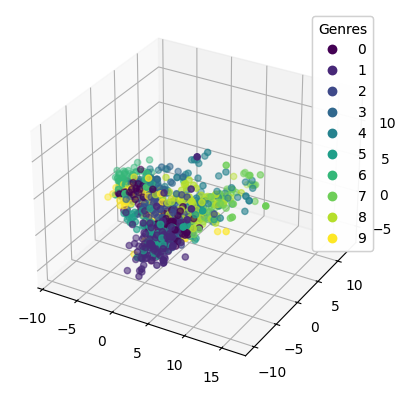

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

unique_labels = np.unique(labels)
label_to_color = {label: idx for idx, label in enumerate(unique_labels)}
colors = np.array([label_to_color[label] for label in labels])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(features_pca[:, 0], features_pca[:, 1], features_pca[:, 2], c=colors, cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Genres")
ax.add_artist(legend1)
plt.show()

In [15]:
import plotly.express as px
import numpy as np

unique_labels = np.unique(labels)
label_to_color = {label: idx for idx, label in enumerate(unique_labels)}
colors = np.array([label_to_color[label] for label in labels])

import pandas as pd
df = pd.DataFrame({
    'PC1': features_pca[:, 0],
    'PC2': features_pca[:, 1],
    'PC3': features_pca[:, 2],
    'Label': labels
})

fig = px.scatter_3d(
    df,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Label',
    title="Interactive 3D Scatter Plot",
    color_discrete_sequence=px.colors.qualitative.Vivid
)

fig.show()

In [49]:
len(labels)

220

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.05, random_state=42)

In [17]:
X_train.shape, X_test.shape, y_train.shape

((949, 57), (50, 57), (949,))

In [18]:
np.unique(y_train)

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [19]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)

# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Neural Network
nn_model = MLPClassifier()
nn_model.fit(X_train, y_train)

c:\Users\prudh\anaconda3\envs\gen_ai1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier()

In [20]:
from sklearn.metrics import classification_report, accuracy_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

# Evaluate SVM
evaluate_model(svm_model, X_test, y_test)

# Evaluate KNN
evaluate_model(knn_model, X_test, y_test)

# Evaluate Decision Tree
evaluate_model(dt_model, X_test, y_test)

# Evaluate Neural Network
evaluate_model(nn_model, X_test, y_test)

Accuracy: 0.76
Accuracy: 0.72
Accuracy: 0.62
Accuracy: 0.74


In [21]:
X_test.shape

(50, 57)

In [22]:
knn_model.predict(X_test)

array(['hiphop', 'pop', 'country', 'disco', 'blues', 'country', 'hiphop',
       'jazz', 'reggae', 'disco', 'country', 'metal', 'reggae', 'metal',
       'pop', 'blues', 'reggae', 'hiphop', 'disco', 'country', 'jazz',
       'blues', 'rock', 'disco', 'blues', 'blues', 'classical', 'country',
       'hiphop', 'disco', 'jazz', 'disco', 'metal', 'jazz', 'metal',
       'metal', 'classical', 'classical', 'metal', 'jazz', 'pop', 'disco',
       'disco', 'hiphop', 'jazz', 'jazz', 'country', 'pop', 'metal',
       'reggae'], dtype=object)

In [23]:
y_test

453       hiphop
793          pop
209      country
309        disco
740          pop
578         jazz
895       reggae
545         jazz
436       hiphop
678        metal
935         rock
635        metal
866       reggae
603        metal
720          pop
70         blues
824       reggae
468       hiphop
382        disco
208      country
570         jazz
377        disco
898       reggae
887       reggae
901         rock
59         blues
168    classical
249      country
810       reggae
344        disco
595         jazz
318        disco
625        metal
542         jazz
622        metal
694        metal
158    classical
198    classical
662        metal
597         jazz
788          pop
380        disco
937         rock
425       hiphop
199    classical
576         jazz
266      country
737          pop
76         blues
870       reggae
Name: genre, dtype: object

In [24]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for SVM
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)
print("Best SVM parameters:", svm_grid.best_params_)
print("Best SVM score:", svm_grid.best_score_)

# Hyperparameter tuning for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)
print("Best KNN parameters:", knn_grid.best_params_)
print("Best KNN score:", knn_grid.best_score_)

# Hyperparameter tuning for Decision Tree
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)
print("Best Decision Tree parameters:", dt_grid.best_params_)
print("Best Decision Tree score:", dt_grid.best_score_)

# Hyperparameter tuning for Neural Network
# nn_param_grid = {
#     'hidden_layer_sizes': [(50,), (100,), (50, 50)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'learning_rate': ['constant', 'adaptive']
# }
# nn_grid = GridSearchCV(MLPClassifier(max_iter=1000), nn_param_grid, cv=5, scoring='accuracy')
# nn_grid.fit(X_train, y_train)
# print("Best Neural Network parameters:", nn_grid.best_params_)
# print("Best Neural Network score:", nn_grid.best_score_)

Best SVM parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM score: 0.7492676134781399


c:\Users\prudh\anaconda3\envs\gen_ai1\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\prudh\anaconda3\envs\gen_ai1\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\prudh\anaconda3\envs\gen_ai1\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\prudh\anaconda3\envs\gen_ai1\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "c:\Users\prudh\anaconda3\envs\gen_ai1\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "c:\Users\prudh\anaconda3\envs\gen_ai1\lib\site-packa

Best KNN parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best KNN score: 0.6944416597048175
Best Decision Tree parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Decision Tree score: 0.5322194374825954


In [3]:
import pandas as pd
df = pd.read_csv('../data/features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [4]:
df.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [7]:
import librosa
import numpy as np
import os
import pandas as pd

def extract_features(file_path):
    try:
        # Load the audio file
        y, sr = librosa.load(file_path, sr=None)

        # Extract features
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rms = librosa.feature.rms(y=y)
        spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85)
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
        harmony, perceptr = librosa.effects.hpss(y)
        onset_env = librosa.onset.onset_strength(y=y, sr=sr)
        tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)[0]
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

        # Calculate mean and variance for each feature
        features = {
            'filename': file_path,
            'length': librosa.get_duration(y=y, sr=sr),
            'chroma_stft_mean': np.mean(chroma_stft),
            'chroma_stft_var': np.var(chroma_stft),
            'rms_mean': np.mean(rms),
            'rms_var': np.var(rms),
            'spectral_centroid_mean': np.mean(spectral_centroid),
            'spectral_centroid_var': np.var(spectral_centroid),
            'spectral_bandwidth_mean': np.mean(spectral_bandwidth),
            'spectral_bandwidth_var': np.var(spectral_bandwidth),
            'rolloff_mean': np.mean(rolloff),
            'rolloff_var': np.var(rolloff),
            'zero_crossing_rate_mean': np.mean(zero_crossing_rate),
            'zero_crossing_rate_var': np.var(zero_crossing_rate),
            'harmony_mean': np.mean(harmony),
            'harmony_var': np.var(harmony),
            'perceptr_mean': np.mean(perceptr),
            'perceptr_var': np.var(perceptr),
            'tempo': tempo,
        }

        for i in range(1, 21):
            features[f'mfcc{i}_mean'] = np.mean(mfcc[i-1])
            features[f'mfcc{i}_var'] = np.var(mfcc[i-1])
        
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

    return features

def extract_features_from_directory(directory):
    features_list = []
    labels = []
    for genre in os.listdir(directory):
        genre_dir = os.path.join(directory, genre)
        if os.path.isdir(genre_dir):
            for file_name in os.listdir(genre_dir):
                file_path = os.path.join(genre_dir, file_name)
                if file_path.endswith('.wav'):  # Ensure the file is a WAV file
                    features = extract_features(file_path)
                    if features is not None:
                        features_list.append(features)
                        labels.append(genre)
    return features_list, labels

# Directory containing the genres
dir = "../data/genres_original"
features_list, labels = extract_features_from_directory(dir)

# Convert to DataFrame
df = pd.DataFrame(features_list)
df['genre'] = labels

# Save to CSV
df.to_csv('../data/gtzan_features_1.csv', index=False)

# Display the first few rows of the DataFrame
print(df.head())

In [1]:
import librosa
import numpy as np
import os
import pandas as pd
from concurrent.futures import ProcessPoolExecutor

def extract_features(file_path):
    try:
        # Load the audio file
        y, sr = librosa.load(file_path, sr=None)

        # Extract features
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rms = librosa.feature.rms(y=y)
        spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85)
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
        harmony, perceptr = librosa.effects.hpss(y)
        onset_env = librosa.onset.onset_strength(y=y, sr=sr)
        tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)[0]
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

        # Calculate mean and variance for each feature
        features = {
            'filename': file_path,
            'length': librosa.get_duration(y=y, sr=sr),
            'chroma_stft_mean': np.mean(chroma_stft),
            'chroma_stft_var': np.var(chroma_stft),
            'rms_mean': np.mean(rms),
            'rms_var': np.var(rms),
            'spectral_centroid_mean': np.mean(spectral_centroid),
            'spectral_centroid_var': np.var(spectral_centroid),
            'spectral_bandwidth_mean': np.mean(spectral_bandwidth),
            'spectral_bandwidth_var': np.var(spectral_bandwidth),
            'rolloff_mean': np.mean(rolloff),
            'rolloff_var': np.var(rolloff),
            'zero_crossing_rate_mean': np.mean(zero_crossing_rate),
            'zero_crossing_rate_var': np.var(zero_crossing_rate),
            'harmony_mean': np.mean(harmony),
            'harmony_var': np.var(harmony),
            'perceptr_mean': np.mean(perceptr),
            'perceptr_var': np.var(perceptr),
            'tempo': tempo,
        }

        for i in range(1, 21):
            features[f'mfcc{i}_mean'] = np.mean(mfcc[i-1])
            features[f'mfcc{i}_var'] = np.var(mfcc[i-1])
        
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

    return features

def process_batch(file_paths, genres):
    features_list = []
    labels = []
    for file_path, genre in zip(file_paths, genres):
        features = extract_features(file_path)
        if features is not None:
            features_list.append(features)
            labels.append(genre)
    return features_list, labels

def extract_features_in_batches(directory, batch_size=10, output_file="../data/gtzan_features_1.csv"):
    files = []
    genres = []
    
    for genre in os.listdir(directory):
        genre_dir = os.path.join(directory, genre)
        if os.path.isdir(genre_dir):
            for i, file_name in enumerate(os.listdir(genre_dir)):
                file_path = os.path.join(genre_dir, file_name)
                if file_path.endswith('.wav'):
                    files.append(file_path)
                    genres.append(genre)
    
    # Split into batches
    batches = [files[i:i+batch_size] for i in range(0, len(files), batch_size)]
    genre_batches = [genres[i:i+batch_size] for i in range(0, len(genres), batch_size)]
    
    # Process batches and save results incrementally
    all_features = []
    for i, (batch_files, batch_genres) in enumerate(zip(batches, genre_batches)):
        print(f"Processing batch {i+1}/{len(batches)}...")
        features, labels = process_batch(batch_files, batch_genres)
        
        batch_df = pd.DataFrame(features)
        batch_df['genre'] = labels
        all_features.append(batch_df)
        
        # Save intermediate results to a CSV file
        if os.path.exists(output_file):
            batch_df.to_csv(output_file, mode='a', header=False, index=False)
        else:
            batch_df.to_csv(output_file, index=False)
    
    # Combine all results into one DataFrame (optional)
    final_df = pd.concat(all_features, ignore_index=True)
    return final_df

# Run the batch processing
directory = "../data/genres_original"
batch_size = 10  # Adjust based on memory and processing power
df = extract_features_in_batches(directory, batch_size)
print("Feature extraction completed.")
print(df.head())

Processing batch 1/100...
Processing batch 2/100...
Processing batch 3/100...
Processing batch 4/100...
Processing batch 5/100...
Processing batch 6/100...
Processing batch 7/100...
Processing batch 8/100...
Processing batch 9/100...
Processing batch 10/100...
Processing batch 11/100...
Processing batch 12/100...
Processing batch 13/100...
Processing batch 14/100...
Processing batch 15/100...
Processing batch 16/100...
Processing batch 17/100...
Processing batch 18/100...
Processing batch 19/100...
Processing batch 20/100...
Processing batch 21/100...
Processing batch 22/100...
Processing batch 23/100...
Processing batch 24/100...
Processing batch 25/100...
Processing batch 26/100...
Processing batch 27/100...
Processing batch 28/100...
Processing batch 29/100...
Processing batch 30/100...
Processing batch 31/100...
Processing batch 32/100...
Processing batch 33/100...
Processing batch 34/100...
Processing batch 35/100...
Processing batch 36/100...
Processing batch 37/100...
Processing

c:\Users\prudh\anaconda3\envs\gen_ai1\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Error processing file ../data/genres_original\jazz\jazz.00054.wav: 
Processing batch 57/100...
Processing batch 58/100...
Processing batch 59/100...
Processing batch 60/100...
Processing batch 61/100...
Processing batch 62/100...
Processing batch 63/100...
Processing batch 64/100...
Processing batch 65/100...
Processing batch 66/100...
Processing batch 67/100...
Processing batch 68/100...
Processing batch 69/100...
Processing batch 70/100...
Processing batch 71/100...
Processing batch 72/100...
Processing batch 73/100...
Processing batch 74/100...
Processing batch 75/100...
Processing batch 76/100...
Processing batch 77/100...
Processing batch 78/100...
Processing batch 79/100...
Processing batch 80/100...
Processing batch 81/100...
Processing batch 82/100...
Processing batch 83/100...
Processing batch 84/100...
Processing batch 85/100...
Processing batch 86/100...
Processing batch 87/100...
Processing batch 88/100...
Processing batch 89/100...
Processing batch 90/100...
Processing bat

In [2]:
df = pd.read_csv('../data/gtzan_features_1.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,genre
0,../data/genres_original\blues\blues.00000.wav,30.013333,0.350129,0.088772,0.130184,0.002828,1784.122641,129745.484419,2002.412407,85834.410406,...,52.424534,-1.687854,36.535866,-0.408730,41.603172,-2.302677,55.053654,1.222467,46.941350,blues
1,../data/genres_original\blues\blues.00001.wav,30.013333,0.340849,0.094976,0.095908,0.002373,1530.261767,375915.508778,2038.987608,213905.103191,...,55.337967,-0.728403,60.231415,0.296872,48.133217,-0.282430,51.106014,0.530644,45.788700,blues
2,../data/genres_original\blues\blues.00002.wav,30.013333,0.363538,0.085257,0.175473,0.002751,1552.832481,156471.010904,1747.754087,76295.413398,...,40.641678,-7.724840,47.629646,-1.819024,52.393597,-3.440457,46.643400,-2.238128,30.653150,blues
3,../data/genres_original\blues\blues.00003.wav,30.013333,0.404854,0.093999,0.141040,0.006348,1070.153418,184366.009438,1596.422564,166551.844243,...,44.432903,-3.324069,50.218452,0.636311,37.325726,-0.615968,37.257774,-3.405046,31.965258,blues
4,../data/genres_original\blues\blues.00004.wav,30.013333,0.308526,0.087843,0.091501,0.002305,1835.128513,343249.495746,1748.410758,88378.704478,...,85.995200,-5.451786,75.276740,-0.915952,53.633236,-4.408018,62.882492,-11.704385,55.190254,blues


In [3]:
demo = df

In [4]:
X = demo.iloc[:, 2:-1]

In [5]:
np.array(X).shape

(999, 57)

In [6]:
labels = demo.iloc[:,-1]

In [7]:
pd.unique(labels)

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [69]:
label_map = {}
for i, label in enumerate(pd.unique(labels)):
    label_map[label] = i

In [37]:
label_map

{'blues': 0,
 'classical': 1,
 'country': 2,
 'disco': 3,
 'hiphop': 4,
 'jazz': 5,
 'metal': 6,
 'pop': 7,
 'reggae': 8,
 'rock': 9}

In [38]:
for i in range(len(labels)):
    labels[i] = label_map[labels[i]]


C:\Users\prudh\AppData\Local\Temp\ipykernel_2516\694758466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels[i] = label_map[labels[i]]
C:\Users\prudh\AppData\Local\Temp\ipykernel_2516\694758466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels[i] = label_map[labels[i]]
C:\Users\prudh\AppData\Local\Temp\ipykernel_2516\694758466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels[i] = label_map[labels[i]]
C:\User

In [39]:
labels

0      0
1      0
2      0
3      0
4      0
      ..
215    9
216    9
217    9
218    9
219    9
Name: genre, Length: 220, dtype: object